In [52]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from branca.element import Figure

In [7]:
# Setting default seaborn parameters

sns.set_theme()
sns.set_style('darkgrid')
sns.set(rc={
    'axes.labelsize': 15,
    'axes.titlesize': 15,
    'axes.titlepad': 10,
    'xtick.labelsize': 10,
    'xtick.color': 'grey',
    'ytick.labelsize': 10,
    'ytick.color': 'grey',
    }) 

In [8]:
def convert_to_k(ax):
    '''Function for converting ylabels count from thousands to k'''
    ylabels = ["{:,.0f}".format(y) + "K" for y in ax.get_yticks() / 1000]
    ax.set_yticks(ax.get_yticks())
    ax.set_yticklabels(ylabels)

In [9]:
# Loading the trip dataset

td = pd.read_csv('data/2011-2012-trip-data.csv')

In [10]:
td.shape

(3255678, 9)

In [11]:
td.tail()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
3255673,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual
3255674,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member
3255675,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member
3255676,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member
3255677,251,2012-12-31 23:59:23,2013-01-01 00:03:34,31223,Convention Center / 7th & M St NW,31241,Thomas Circle,W01460,Member


In [12]:
td.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member
1,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual
2,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member
3,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member
4,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual


In [13]:
# Checking for NaN values

td.isna().sum()

Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64

In [14]:
# Lowercasing the column names

td.columns = td.columns.str.lower()

In [15]:
td.loc[td['member type'] == 'Unknown']

,duration,start date,end date,start station number,start station,end station number,end station,bike number,member type
414633,501,2011-06-09 14:34:39,2011-06-09 14:43:00,31205,21st & I St NW,31232,7th & F St NW / National Portrait Gallery,W00182,Unknown
424868,2233,2011-06-11 17:40:02,2011-06-11 18:17:15,31215,Georgetown Harbor / 30th St NW,31214,17th & Corcoran St NW,W00812,Unknown
787755,257,2011-08-31 10:17:31,2011-08-31 10:21:48,31218,L'Enfant Plaza / 7th & C St SW,31219,10th St & Constitution Ave NW,W00239,Unknown
1059539,443,2011-11-06 01:29:12,2011-11-06 01:36:35,31010,S Glebe & Potomac Ave,31013,Eads & 22nd St S,W01017,Unknown
1384594,1181,2012-02-18 17:20:47,2012-02-18 17:40:29,31232,7th & F St NW / National Portrait Gallery,31201,15th & P St NW,W00880,Unknown
1554304,125,2012-03-26 01:47:39,2012-03-26 01:49:45,31241,Thomas Circle,31203,14th & Rhode Island Ave NW,W00825,Unknown
1700456,1341,2012-04-19 16:23:59,2012-04-19 16:46:20,31014,Lynn & 19th St North,31007,Crystal City Metro / 18th & Bell St,W20053,Unknown
1702913,1039,2012-04-19 20:17:07,2012-04-19 20:34:27,31215,Georgetown Harbor / 30th St NW,31609,Maine Ave & 7th St SW,W01191,Unknown
1706947,384,2012-04-20 14:34:16,2012-04-20 14:40:41,31234,20th & O St NW / Dupont South,31246,M St & Pennsylvania Ave NW,W00491,Unknown
2083866,2242,2012-06-20 00:05:36,2012-06-20 00:42:59,31235,19th St & Constitution Ave NW,31220,US Dept of State / Virginia Ave & 21st St NW,W00703,Unknown


In [16]:
td['start date'] = pd.to_datetime(td['start date'])
td['end date'] = pd.to_datetime(td['end date'])

In [17]:
td['member type'] = pd.Categorical(td['member type'], categories=["Casual", "Member", "Unknown"])

In [18]:
td.dtypes

duration                         int64
start date              datetime64[ns]
end date                datetime64[ns]
start station number             int64
start station                   object
end station number               int64
end station                     object
bike number                     object
member type                   category
dtype: object

In [108]:
# Top 10 starting stations and ending stations

top10_ss = td['start station'].value_counts().head(10).reset_index()
top10_ss.columns = ['start station', 'counts']
top10_es = td['end station'].value_counts().head(10).reset_index()
top10_es.columns = ['end station', 'counts']

In [20]:
# Top 10 starting stations and ending stations for casual users

top10_ss_c = td[td['member type'] == 'Casual']['start station'].value_counts().head(10).reset_index()
top10_ss_c.columns = ['start station', 'counts']
top10_es_c = td[td['member type'] == 'Casual']['end station'].value_counts().head(10).reset_index()
top10_es_c.columns = ['end station', 'counts']

In [21]:
# Top 10 starting stations and ending stations for members

top10_ss_r = td[td['member type'] == 'Member']['start station'].value_counts().head(10).reset_index()
top10_ss_r.columns = ['start station', 'counts']
top10_es_r = td[td['member type'] == 'Member']['end station'].value_counts().head(10).reset_index()
top10_es_r.columns = ['end station', 'counts']

In [22]:
display(top10_ss_r)
display(top10_es_r)

,start station,counts
0,Massachusetts Ave & Dupont Circle NW,85223
1,Columbus Circle / Union Station,68023
2,15th & P St NW,64285
3,17th & Corcoran St NW,57301
4,Adams Mill & Columbia Rd NW,55241
5,14th & V St NW,52065
6,New Hampshire Ave & T St NW,50473
7,Eastern Market Metro / Pennsylvania Ave & 7th ...,47479
8,20th St & Florida Ave NW,43683
9,16th & Harvard St NW,43191


,end station,counts
0,Massachusetts Ave & Dupont Circle NW,96230
1,15th & P St NW,73825
2,Columbus Circle / Union Station,68271
3,17th & Corcoran St NW,61073
4,14th & V St NW,53630
5,New Hampshire Ave & T St NW,52187
6,Adams Mill & Columbia Rd NW,46254
7,Eastern Market Metro / Pennsylvania Ave & 7th ...,45251
8,14th & Rhode Island Ave NW,44652
9,21st & I St NW,44362


In [23]:
display(top10_ss_c)
display(top10_es_c)

,start station,counts
0,19th St & Constitution Ave NW,23508
1,Massachusetts Ave & Dupont Circle NW,21938
2,Jefferson Dr & 14th St SW,19710
3,10th St & Constitution Ave NW,17423
4,USDA / 12th & Independence Ave SW,17143
5,C & O Canal & Wisconsin Ave NW,14760
6,New York Ave & 15th St NW,13306
7,7th & F St NW / National Portrait Gallery,12457
8,Smithsonian-National Mall / Jefferson Dr & 12t...,12451
9,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,12271


,end station,counts
0,19th St & Constitution Ave NW,23442
1,Massachusetts Ave & Dupont Circle NW,22477
2,USDA / 12th & Independence Ave SW,20731
3,Jefferson Dr & 14th St SW,19064
4,10th St & Constitution Ave NW,18364
5,C & O Canal & Wisconsin Ave NW,17229
6,New York Ave & 15th St NW,15032
7,Georgetown Harbor / 30th St NW,14123
8,Smithsonian-National Mall / Jefferson Dr & 12t...,12463
9,Ohio Dr & West Basin Dr SW / MLK & FDR Memorials,12443


In [24]:
display(top10_ss)
display(top10_es)

,start station,counts
0,Massachusetts Ave & Dupont Circle NW,107162
1,Columbus Circle / Union Station,77750
2,15th & P St NW,73707
3,17th & Corcoran St NW,63502
4,Adams Mill & Columbia Rd NW,62378
5,14th & V St NW,58356
6,Eastern Market Metro / Pennsylvania Ave & 7th ...,56029
7,New Hampshire Ave & T St NW,55812
8,14th & Rhode Island Ave NW,50142
9,20th St & Florida Ave NW,49812


,end station,counts
0,Massachusetts Ave & Dupont Circle NW,118707
1,15th & P St NW,83457
2,Columbus Circle / Union Station,79681
3,17th & Corcoran St NW,67382
4,14th & V St NW,59658
5,New Hampshire Ave & T St NW,57145
6,8th & H St NW,54811
7,21st & I St NW,54259
8,Eastern Market Metro / Pennsylvania Ave & 7th ...,54070
9,Adams Mill & Columbia Rd NW,52546


<Axes: xlabel='member type', ylabel='count'>

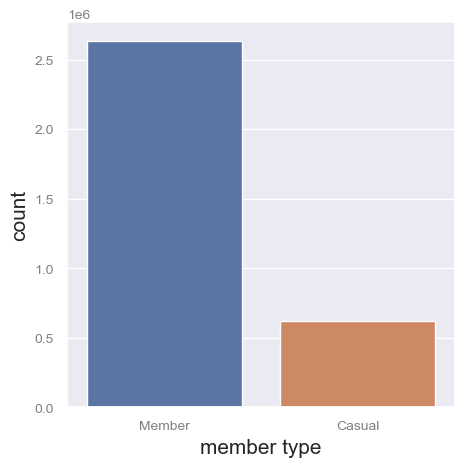

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.countplot(data=td, x='member type', order=["Member", "Casual"])

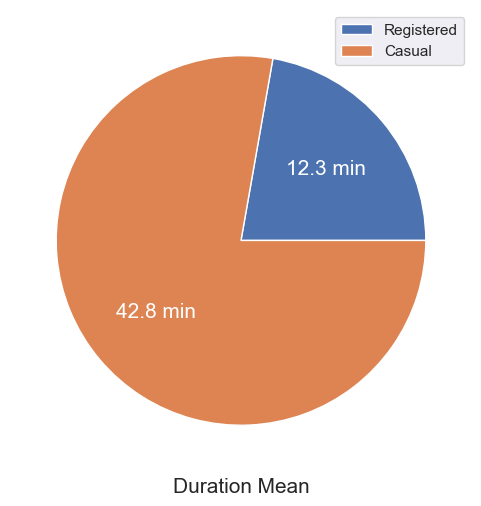

In [26]:
labels = ["Registered", "Casual"]
duration = [
    td[td["member type"] == "Member"]["duration"].mean() / 60,
    td[td["member type"] == "Casual"]["duration"].mean() / 60,
]

fig, ax = plt.subplots(figsize=(6, 6))
p, tx, autotexts = plt.pie(duration, autopct="", textprops={"fontsize": 15, "color": "w"})
for i, a in enumerate(autotexts):
    a.set_text("{} min".format(round(duration[i], 1)))
plt.legend(labels=labels)
plt.xlabel("Duration Mean")
plt.show()

In [100]:
import folium
from folium.plugins import HeatMap
import geopy

In [28]:
# Geocodong the station addresses

# geocoder = geopy.Nominatim(user_agent= 'BikeSharingML (mymail@gmail.com) - Python Geocoding Script', timeout=5)
# geocodes = []
names = td['start station'].unique()

# for i in names:
#     address = geocoder.geocode(i)
#     geocodes.append(address)

In [29]:
# Replacing None with list of [None, None], so the loops

# locations = pd.DataFrame(columns=['address', 'location'])

# for g in geocodes:
#     if g != None:
#         locations.loc[len(locations)] = [g[0], g[1]]
#     else:
#         locations.loc[len(locations)] = [None, None]

In [30]:
gd = pd.read_excel('data/geodata.xlsx')
gd = gd.iloc[:, 1:]

In [31]:
gd.isna().sum()

location         0
start station    0
dtype: int64

In [110]:
gd

,location,start station
0,"(38.8972217, -77.019347)",5th & F St NW
1,"(38.9267997, -77.0322)",14th & Harvard St NW
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW
...,...,...
189,"(38.8054518, -77.0504514)",King St & Patrick St
190,"(38.8114557, -77.050276)",Henry St & Pendleton St
191,"(38.889335, -77.0777248)",Arlington Blvd & N Queen St
192,"(38.8848997, -77.0879448)",Barton St & 10th St N


In [32]:
ttd = pd.merge(td, gd, on='start station', how='inner')


In [33]:
tsc = pd.merge(gd, top10_ss_c, on='start station', how='inner')
tsr = pd.merge(gd, top10_ss_r, on='start station', how='inner')
tss_both = pd.merge(tsc, tsr, on='location', how='inner')

In [34]:
gde = gd.rename(columns={'start station': 'end station'})

In [35]:
gde

,location,end station
0,"(38.8972217, -77.019347)",5th & F St NW
1,"(38.9267997, -77.0322)",14th & Harvard St NW
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW
...,...,...
189,"(38.8054518, -77.0504514)",King St & Patrick St
190,"(38.8114557, -77.050276)",Henry St & Pendleton St
191,"(38.889335, -77.0777248)",Arlington Blvd & N Queen St
192,"(38.8848997, -77.0879448)",Barton St & 10th St N


In [36]:
tec = pd.merge(gde, top10_es_c, on='end station', how='inner')
ter = pd.merge(gde, top10_es_r, on='end station', how='inner')

In [37]:
tss_both

,location,start station_x,counts_x,start station_y,counts_y
0,"(38.9081498, -77.0383613)",Massachusetts Ave & Dupont Circle NW,21938,Massachusetts Ave & Dupont Circle NW,85223


In [38]:
ttd.sort_values(by='start date')

,duration,start date,end date,start station number,start station,end station number,end station,bike number,member type,location
0,3548,2011-01-01 00:01:29,2011-01-01 01:00:37,31620,5th & F St NW,31620,5th & F St NW,W00247,Member,"(38.8972217, -77.019347)"
30764,346,2011-01-01 00:02:46,2011-01-01 00:08:32,31105,14th & Harvard St NW,31101,14th & V St NW,W00675,Casual,"(38.9267997, -77.0322)"
69536,562,2011-01-01 00:06:13,2011-01-01 00:15:36,31400,Georgia & New Hampshire Ave NW,31104,Adams Mill & Columbia Rd NW,W00357,Member,"(38.9366935, -77.0241778)"
92524,434,2011-01-01 00:09:21,2011-01-01 00:16:36,31111,10th & U St NW,31503,Florida Ave & R St NW,W00970,Member,"(38.91711546315044, -77.02599642535804)"
130673,233,2011-01-01 00:28:26,2011-01-01 00:32:19,31104,Adams Mill & Columbia Rd NW,31106,Calvert & Biltmore St NW,W00346,Casual,"(38.9230634, -77.0425361)"
...,...,...,...,...,...,...,...,...,...,...
1545015,8630,2012-12-31 23:51:38,2013-01-01 02:15:29,31619,Lincoln Park / 13th & East Capitol St NE,31619,Lincoln Park / 13th & East Capitol St NE,W00704,Casual,"(38.8904607, -76.988355)"
806733,418,2012-12-31 23:56:19,2013-01-01 00:03:17,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W00098,Member,"(38.9181158, -77.0343941)"
806734,384,2012-12-31 23:56:35,2013-01-01 00:03:00,31101,14th & V St NW,31200,Massachusetts Ave & Dupont Circle NW,W01398,Member,"(38.9181158, -77.0343941)"
515104,448,2012-12-31 23:58:20,2013-01-01 00:05:49,31613,Eastern Market Metro / Pennsylvania Ave & 7th ...,31607,14th & D St SE,W01301,Member,"(38.8840555, -76.9952624)"


In [114]:
len(td[td['start date'] < "2012-01-01"]['start station'].unique())

191

In [39]:
def get_loc(l):
    return list(map(float, l[1:-1].split(', ')))

In [103]:
fig = Figure(width=800, height=600)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in gd['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)

fig.add_child(washington)

In [96]:
fig = Figure(width=800, height=600)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in tec['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)
for l in ter['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="blue")).add_to(washington)
for l in tss_both['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="red")).add_to(washington)
fig.add_child(washington)

In [59]:
fig = Figure(width=800, height=600)

washington = folium.Map(location=[38.8951, -77.0364], zoom_start=12)
for l in tsc['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="orange")).add_to(washington)
for l in tsr['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="blue")).add_to(washington)
for l in tss_both['location']:
    folium.Marker(location=get_loc(l), icon=folium.Icon(color="red")).add_to(washington)
fig.add_child(washington)

In [72]:
cbs = pd.read_csv('data/Capital_Bikeshare_Locations.csv')

In [76]:
c

,X,Y,NAME,STATION_TYPE,STATION_ID,STATION_STATUS,LAST_REPORTED,NUM_DOCKS_AVAILABLE,NUM_DOCKS_DISABLED,NUM_BIKES_AVAILABLE,...,EIGHTD_HAS_KEY_DISPENSER,CAPACITY,RENTAL_METHODS,REGION_ID,REGION_NAME,GIS_ID,LATITUDE,LONGITUDE,GIS_LAST_MOD_DTTM,OBJECTID
0,-77.192644,39.106981,Corporate Blvd & Omega Dr,classic,58c07d78-f78e-4215-8548-7b0f37bafc73,NaN,2023/09/15 07:25:50+00,10,0,5,...,NO,15,"KEY,CREDITCARD",43,DCA-CABI,NaN,39.106971,-77.192645,2023/09/15 07:31:57+00,129788424
1,-76.933096,38.908481,Deanwood Rec Center,classic,0825baa3-1f3f-11e7-bf6b-3863bb334450,NaN,2023/09/15 07:26:07+00,6,0,9,...,NO,15,"KEY,CREDITCARD",42,DCA-CABI,NaN,38.908473,-76.933099,2023/09/15 07:31:57+00,129788425
2,-76.983686,38.915615,New York Ave & Hecht Ave NE,classic,0826132d-1f3f-11e7-bf6b-3863bb334450,NaN,2023/09/15 07:24:05+00,14,0,9,...,NO,23,"KEY,CREDITCARD",42,DCA-CABI,NaN,38.915604,-76.983683,2023/09/15 07:31:57+00,129788426
3,-77.050034,38.865564,Long Bridge Park / Long Bridge Dr & 6th St S,classic,0825fb66-1f3f-11e7-bf6b-3863bb334450,NaN,2023/09/15 07:26:18+00,8,0,5,...,NO,15,"KEY,CREDITCARD",41,DCA-CABI,NaN,38.865553,-77.050030,2023/09/15 07:31:57+00,129788427
4,-77.013824,38.958108,Kansas Ave & Longfellow St NW,classic,d1fd7121-67e3-46a9-b415-e84a565394f2,NaN,2023/09/15 07:25:43+00,16,0,3,...,NO,19,"KEY,CREDITCARD",42,DCA-CABI,NaN,38.958098,-77.013821,2023/09/15 07:31:57+00,129788428
